In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Ensure images are saved to the correct directory
FIGURES_DIR = '../reports/figures'
os.makedirs(FIGURES_DIR, exist_ok=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 1. Helper Functions
Functions to generate standard EDA plots: Feature Importance, Histograms, and Boxplots.

In [12]:
def save_and_show_feature_importance(df, target, title, filename, top_n=15):
    print(f"Processing Feature Importance: {title}...")
    X = df.drop(target, axis=1)
    y = df[target]

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = SimpleImputer(strategy='median')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    pipeline.fit(X, y)
    
    try:
        onehot_cols = pipeline.named_steps['preprocessor'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
        feature_names = np.r_[numeric_features, onehot_cols]
    except:
        feature_names = numeric_features
        
    importances = pipeline.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=importances[indices[:top_n]], y=feature_names[indices[:top_n]], palette='viridis')
    plt.title(f'Feature Importance: {title}')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, filename))
    plt.show()

def plot_distributions(df, cols, title_prefix, filename_suffix):
    print(f"Plotting Distributions: {title_prefix}...")
    num_cols = len(cols)
    rows = (num_cols // 3) + 1
    plt.figure(figsize=(15, rows * 4))
    for i, col in enumerate(cols):
        plt.subplot(rows, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
    plt.suptitle(f'{title_prefix} Feature Distributions', y=1.02)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, f'{filename_suffix}_distributions.png'))
    plt.show()

def plot_boxplots(df, cols, title_prefix, filename_suffix):
    print(f"Plotting Outliers (Boxplots): {title_prefix}...")
    num_cols = len(cols)
    rows = (num_cols // 3) + 1
    plt.figure(figsize=(15, rows * 4))
    for i, col in enumerate(cols):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(x=df[col], color='salmon')
        plt.title(f'Boxplot of {col}')
    plt.suptitle(f'{title_prefix} Feature Outliers', y=1.02)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGURES_DIR, f'{filename_suffix}_boxplots.png'))
    plt.show()

# 2. Smoker Status EDA

In [13]:
df_smoker = pd.read_csv('../data/raw/train_dataset.csv')
print("Shape:", df_smoker.shape)
display(df_smoker.describe())

Shape: (38984, 23)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


## 2.1 Feature Distributions (Normality Check)
Crucial for models like SVM/KNN to see if data is skewed.

Plotting Distributions: Smoker...


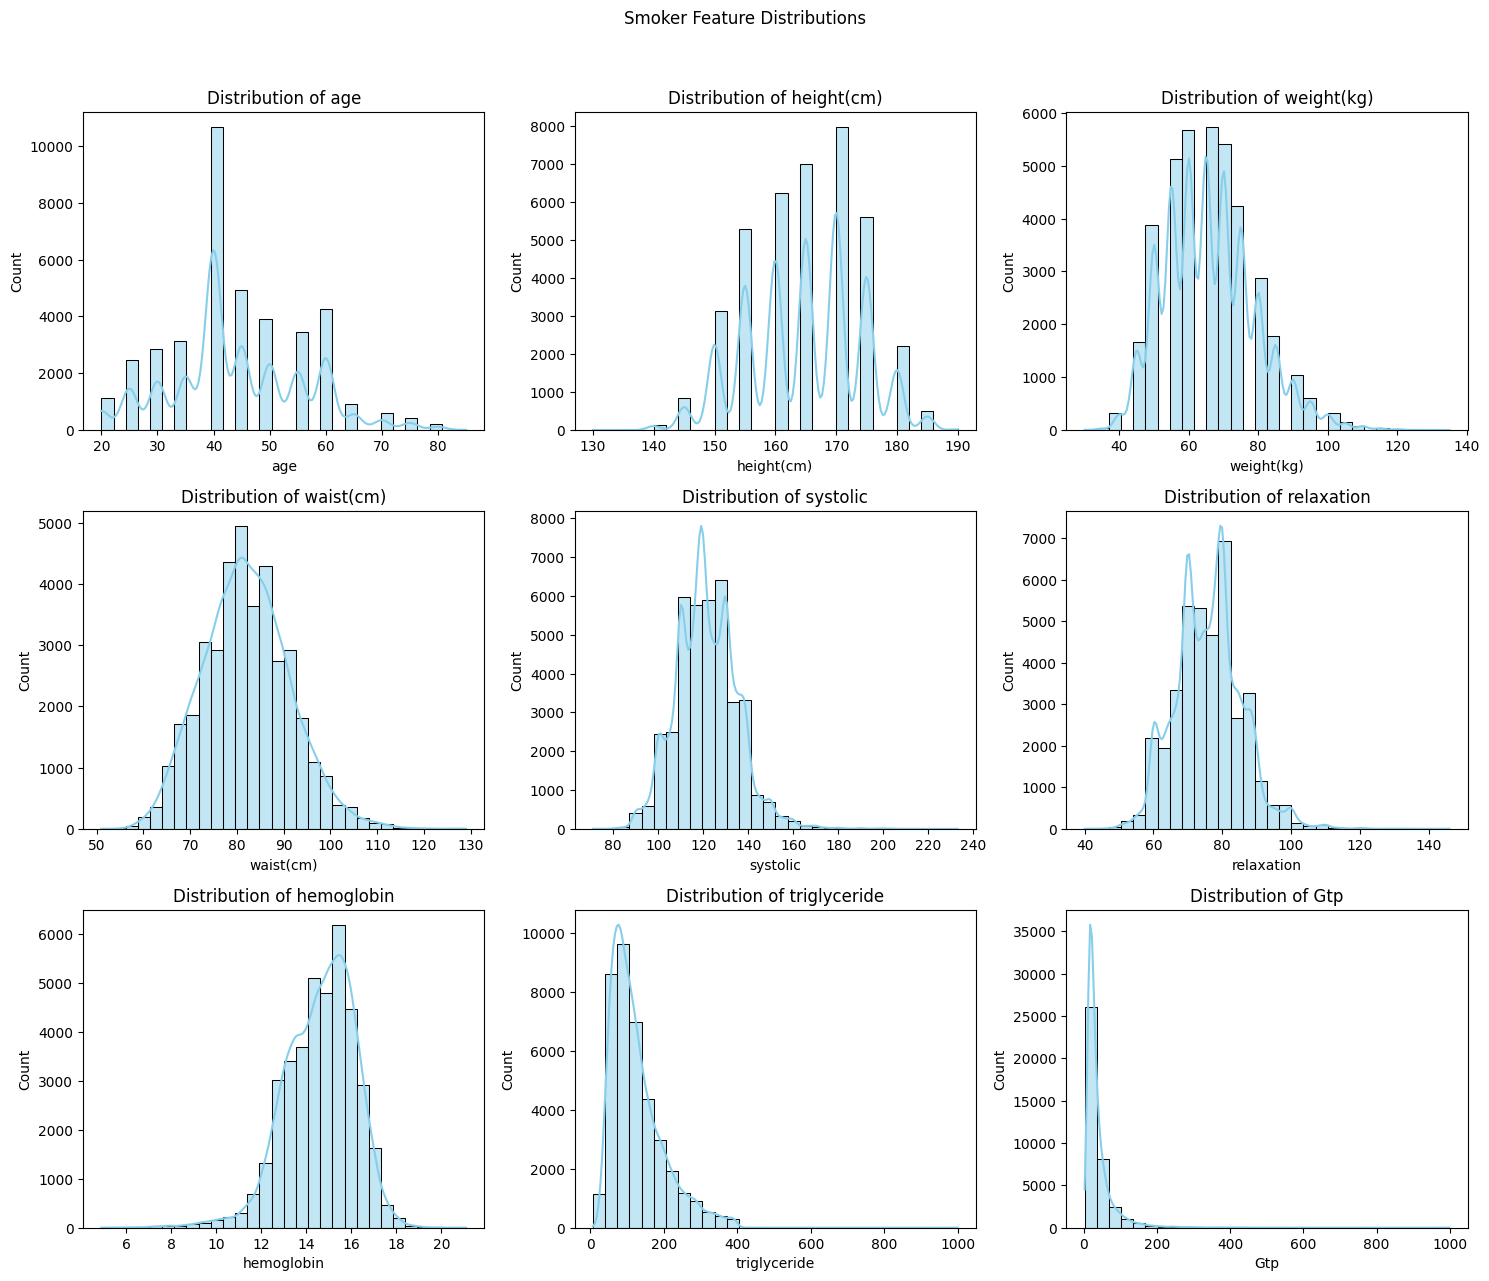

In [14]:
numeric_cols_smoker = df_smoker.select_dtypes(include=['float64', 'int64']).columns.drop('smoking', errors='ignore')
# Select top 9 interesting physiological features to avoid clutter
selected_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation', 'hemoglobin', 'triglyceride', 'Gtp']
plot_distributions(df_smoker, selected_cols, 'Smoker', 'smoker')

## 2.2 Outlier Detection

Plotting Outliers (Boxplots): Smoker...


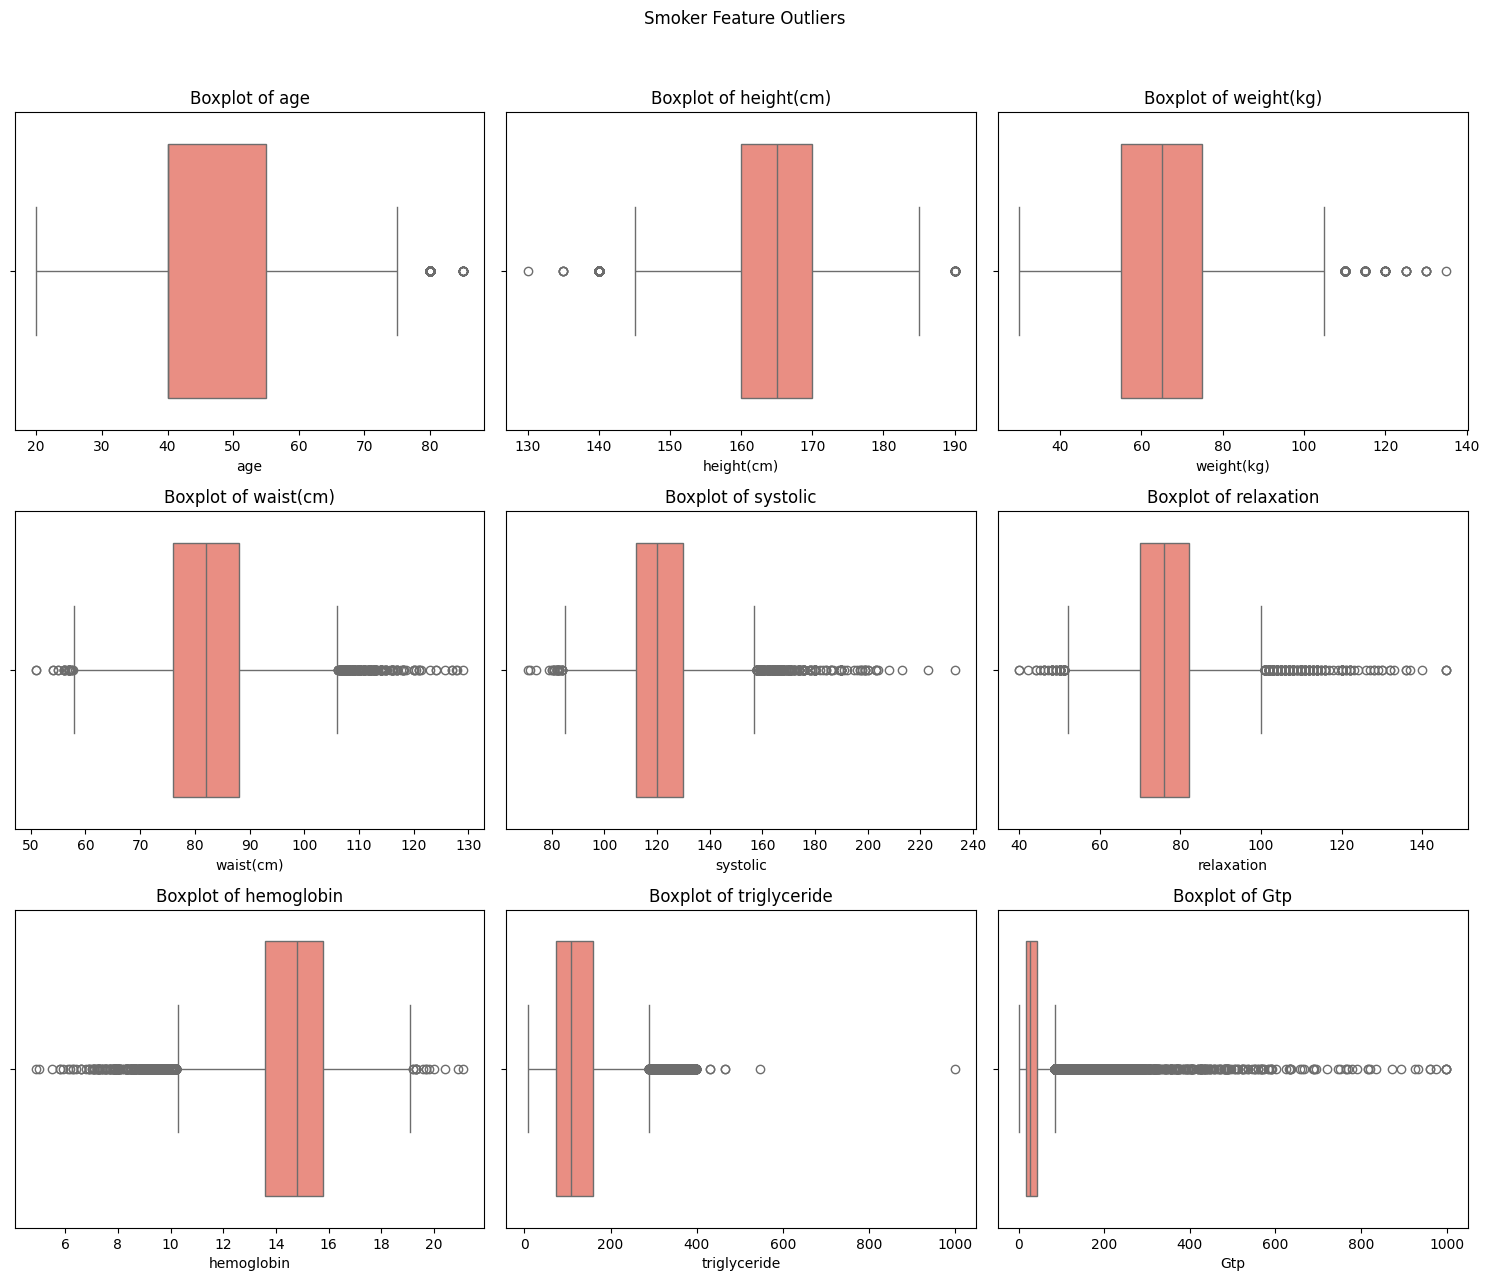

In [15]:
plot_boxplots(df_smoker, selected_cols, 'Smoker', 'smoker')

## 2.3 Class Balance

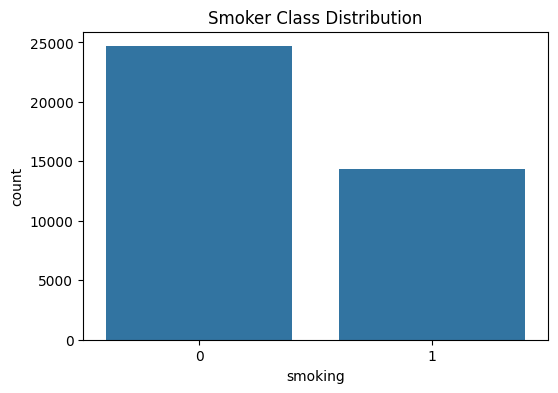

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=df_smoker)
plt.title('Smoker Class Distribution')
plt.savefig(os.path.join(FIGURES_DIR, 'smoker_class_dist.png'))
plt.show()

## 2.4 Correlation Heatmap

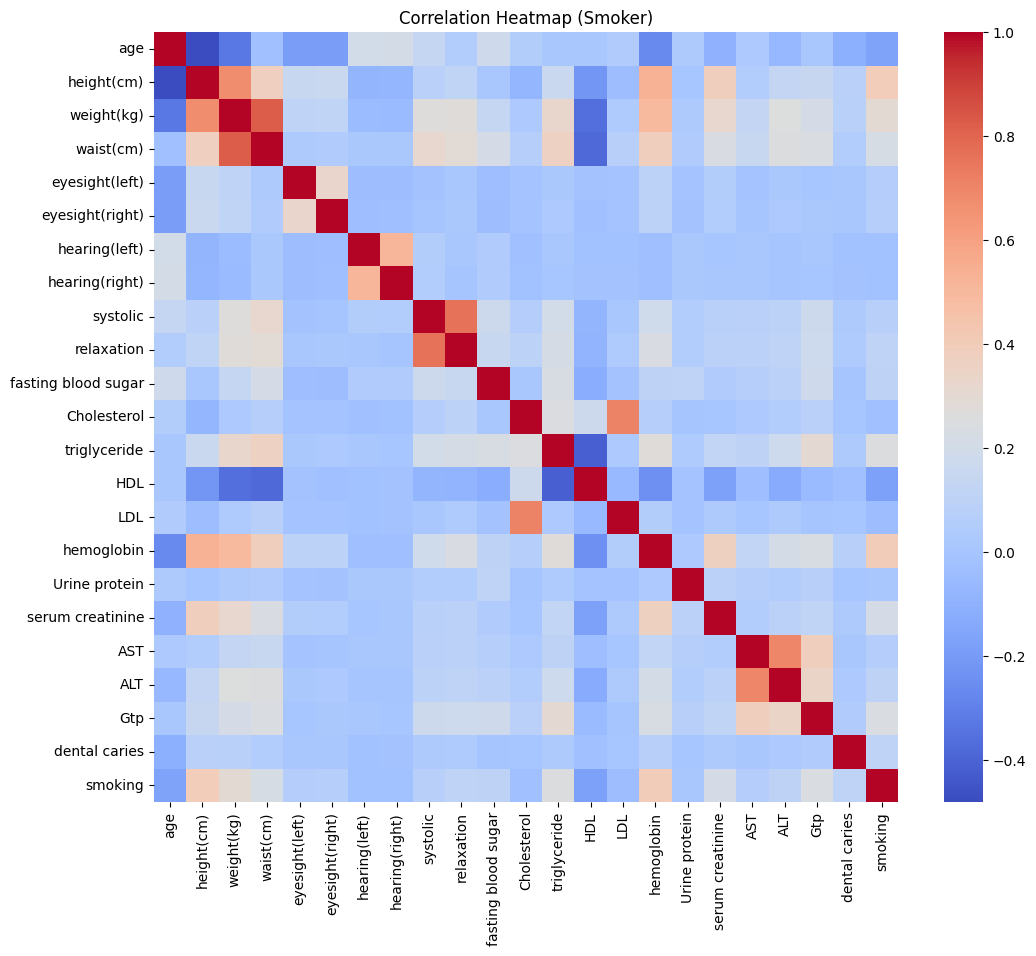

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_smoker.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Smoker)')
plt.savefig(os.path.join(FIGURES_DIR, 'smoker_correlation.png'))
plt.show()

## 2.5 Feature Importance

Processing Feature Importance: Smoker Status...


C:\Users\NIKHIL AGRAWAL\AppData\Local\Temp\ipykernel_6744\1093813786.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:top_n]], y=feature_names[indices[:top_n]], palette='viridis')


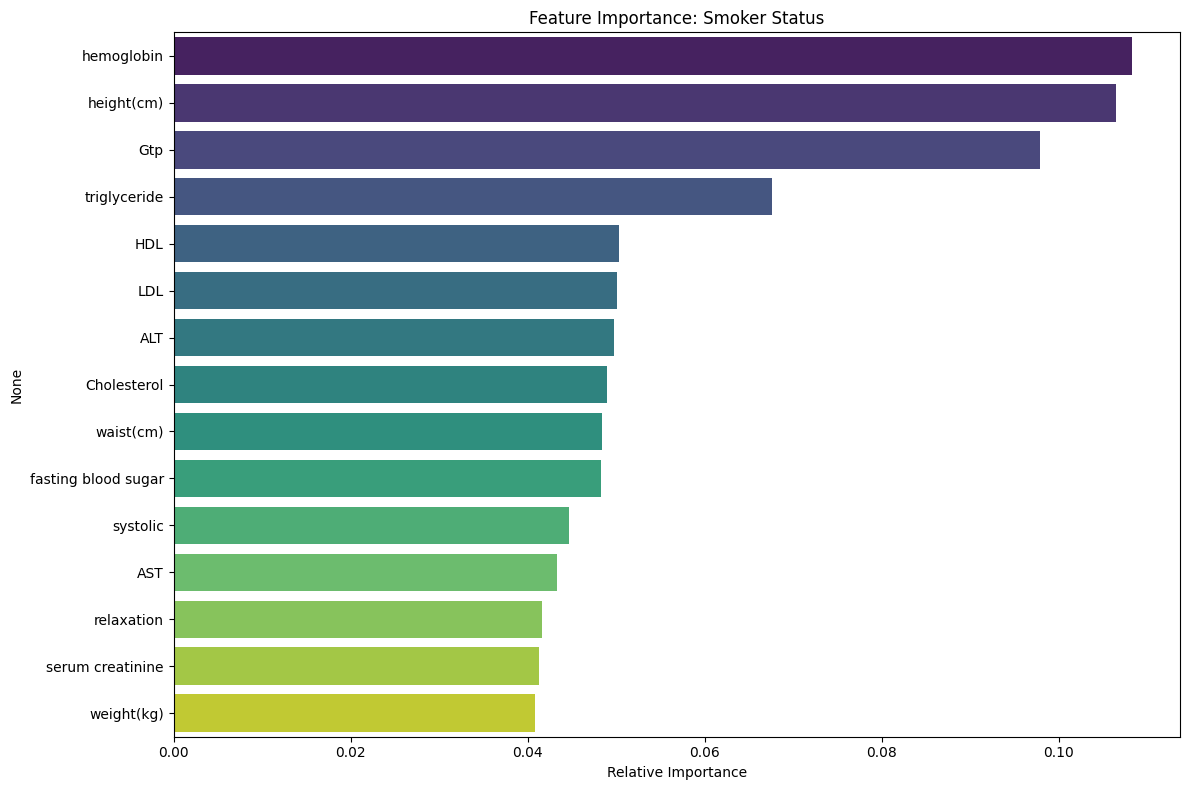

In [18]:
save_and_show_feature_importance(df_smoker, 'smoking', 'Smoker Status', 'feature_importance_smoker.png')

# 3. Forest Cover EDA

In [19]:
df_forest = pd.read_csv('../data/raw/covtype.csv')
if 'Id' in df_forest.columns:
    df_forest = df_forest.drop('Id', axis=1)
print("Shape:", df_forest.shape)
display(df_forest.describe())

Shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## 3.1 Feature Distributions (Continuous)
Forest cover has many binary columns (Soil types). We focus plots on continuous geographic features.

Plotting Distributions: Forest...


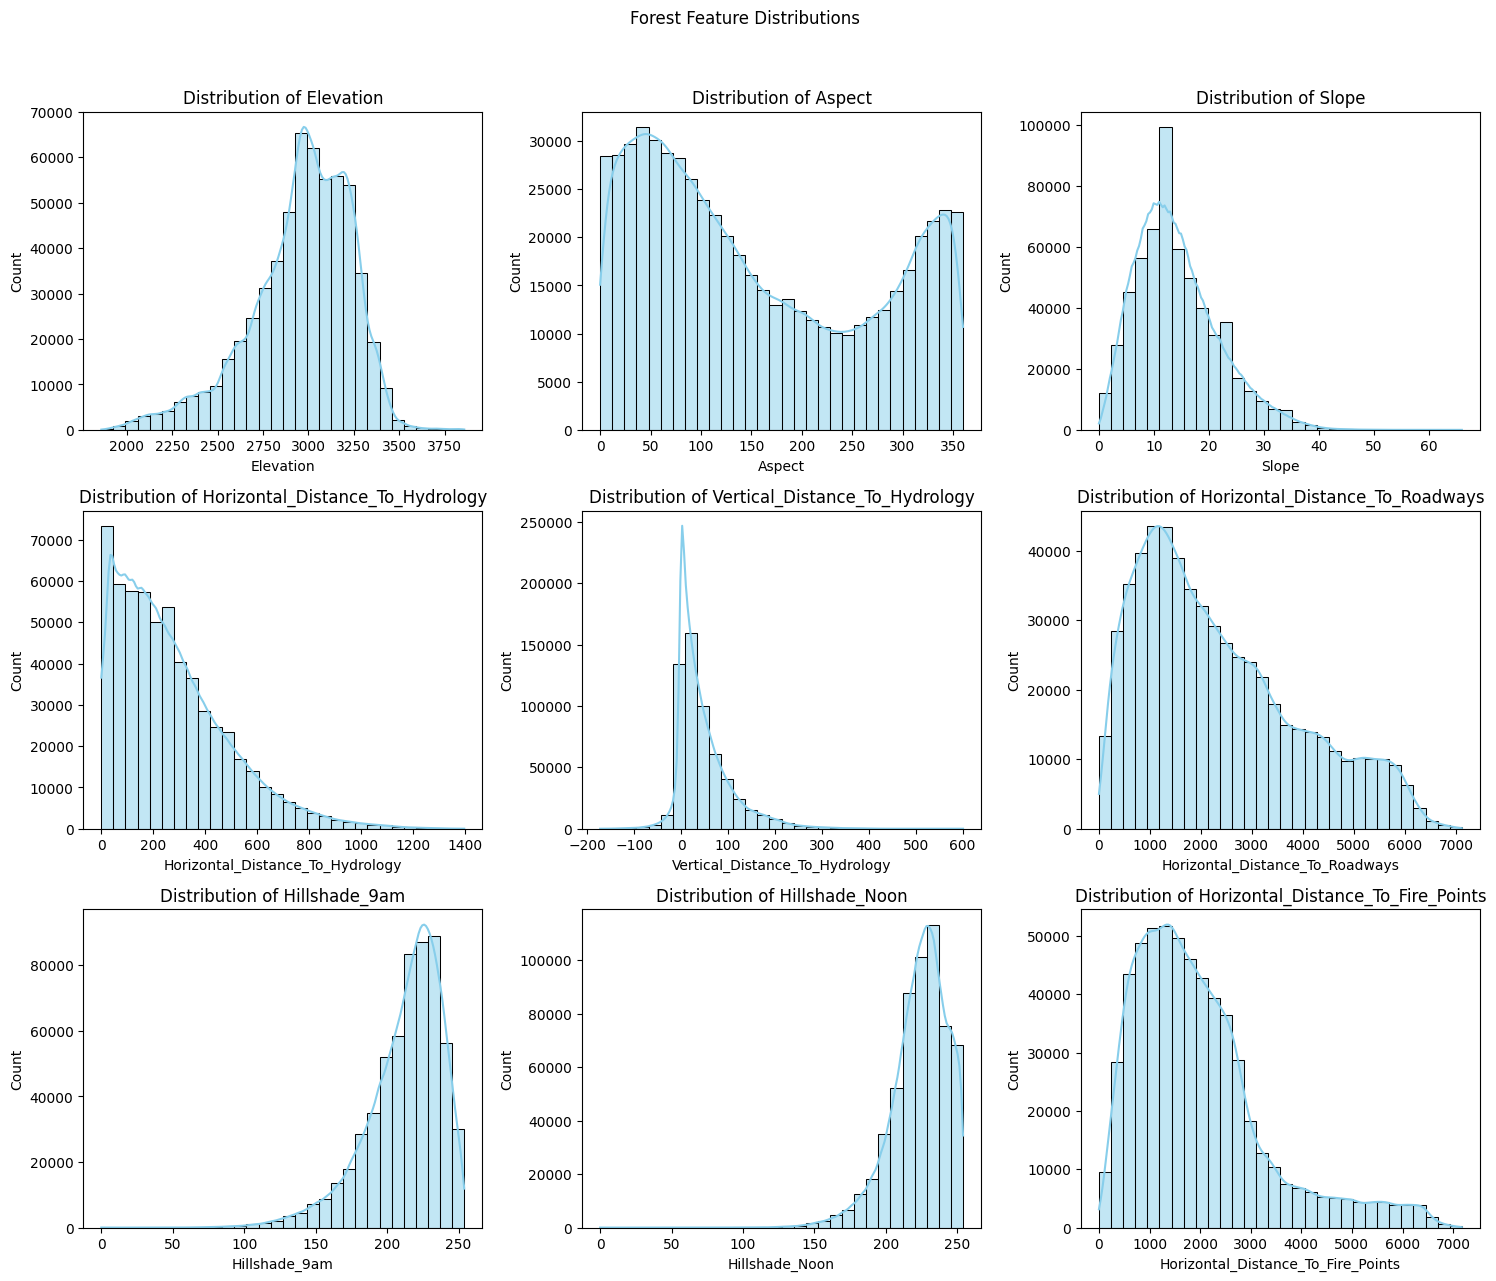

In [20]:
geo_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
            'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
            'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']
plot_distributions(df_forest, geo_cols, 'Forest', 'forest')

## 3.2 Outlier Detection

Plotting Outliers (Boxplots): Forest...


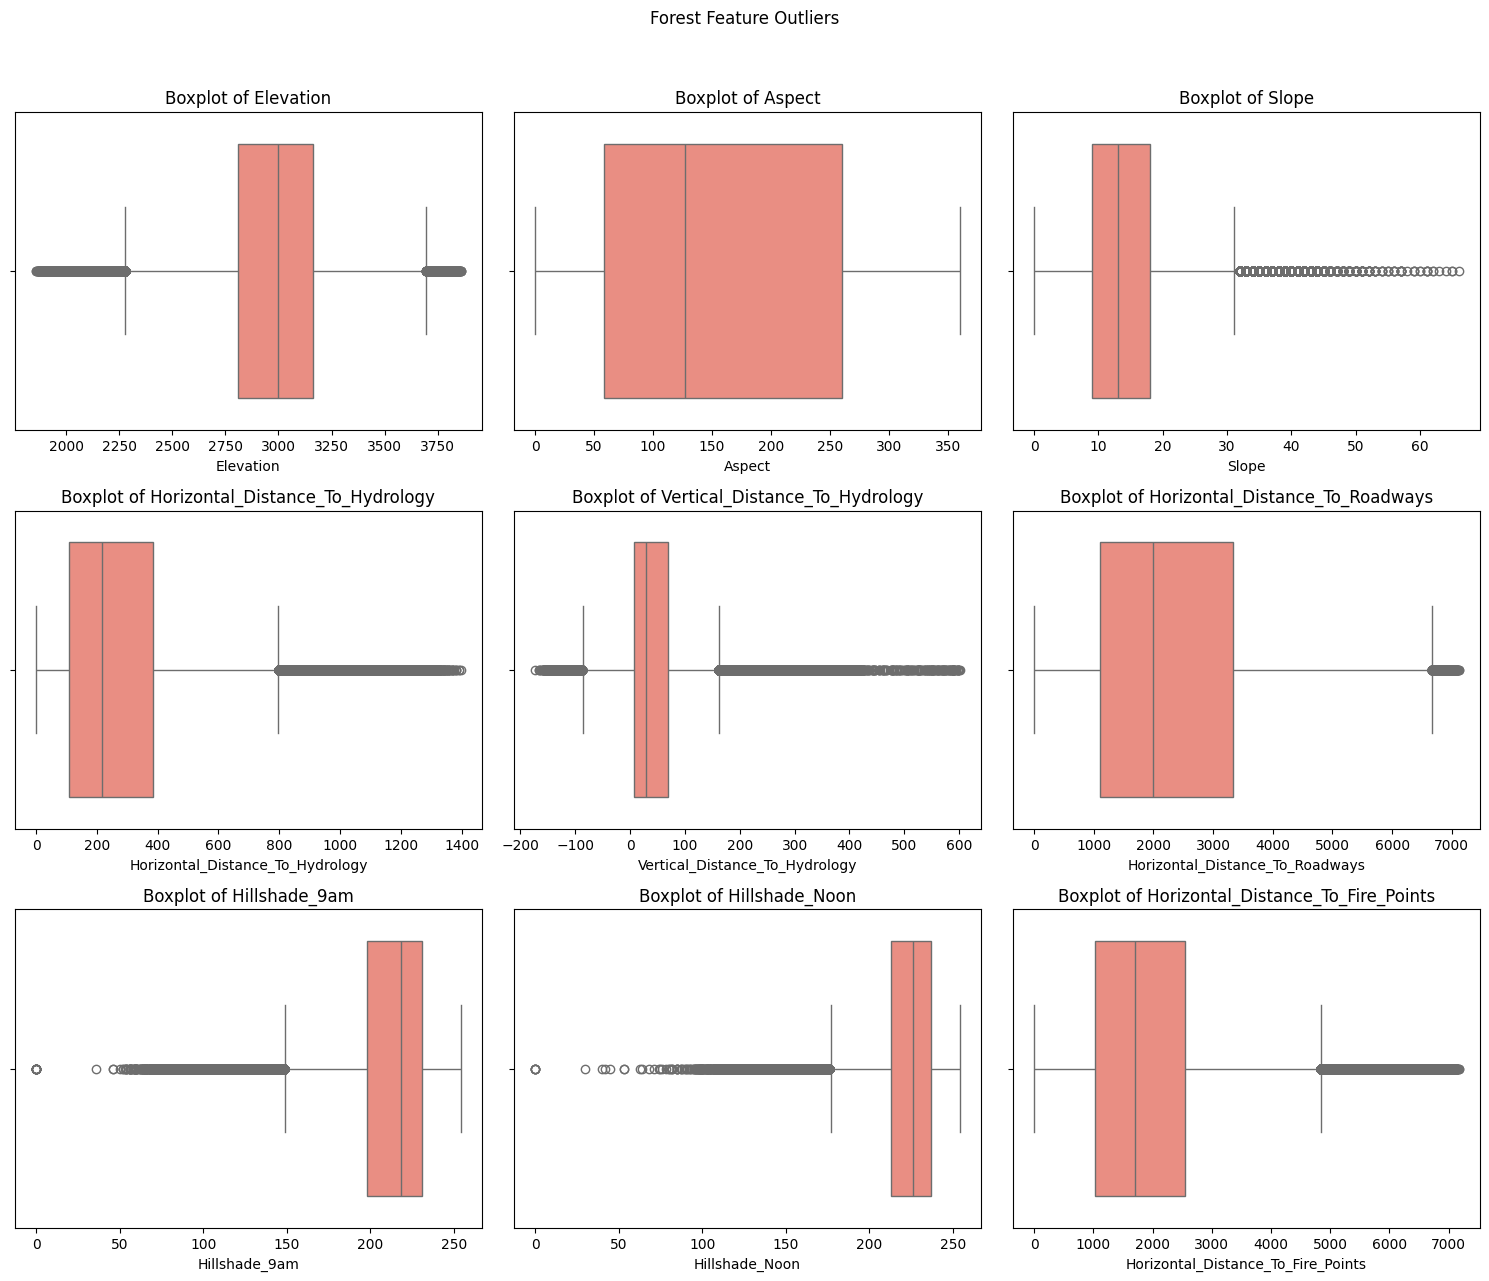

In [21]:
plot_boxplots(df_forest, geo_cols, 'Forest', 'forest')

## 3.3 Class Balance

C:\Users\NIKHIL AGRAWAL\AppData\Local\Temp\ipykernel_6744\227076788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df_forest, palette='viridis')


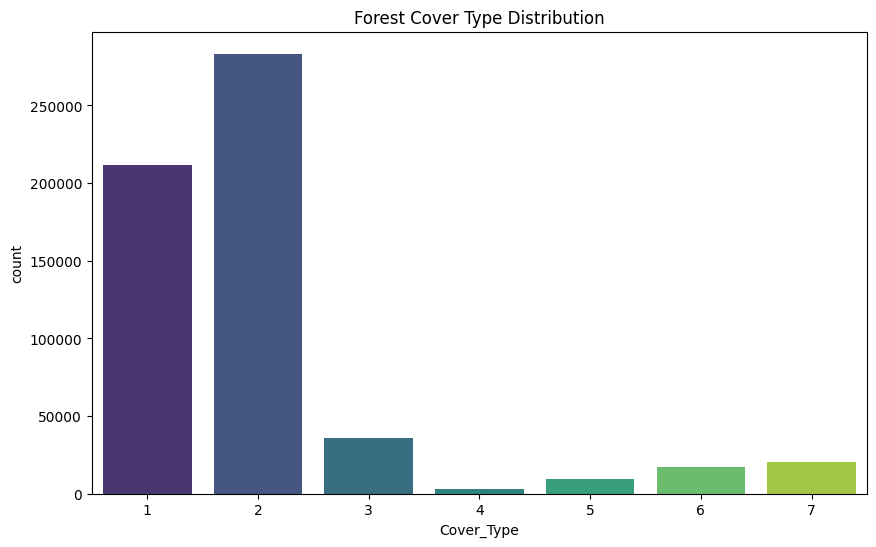

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df_forest, palette='viridis')
plt.title('Forest Cover Type Distribution')
plt.savefig(os.path.join(FIGURES_DIR, 'forest_class_dist.png'))
plt.show()

## 3.4 Key Relationship: Elevation vs Cover Type

C:\Users\NIKHIL AGRAWAL\AppData\Local\Temp\ipykernel_6744\620108303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y='Elevation', data=df_forest, palette='Set2')


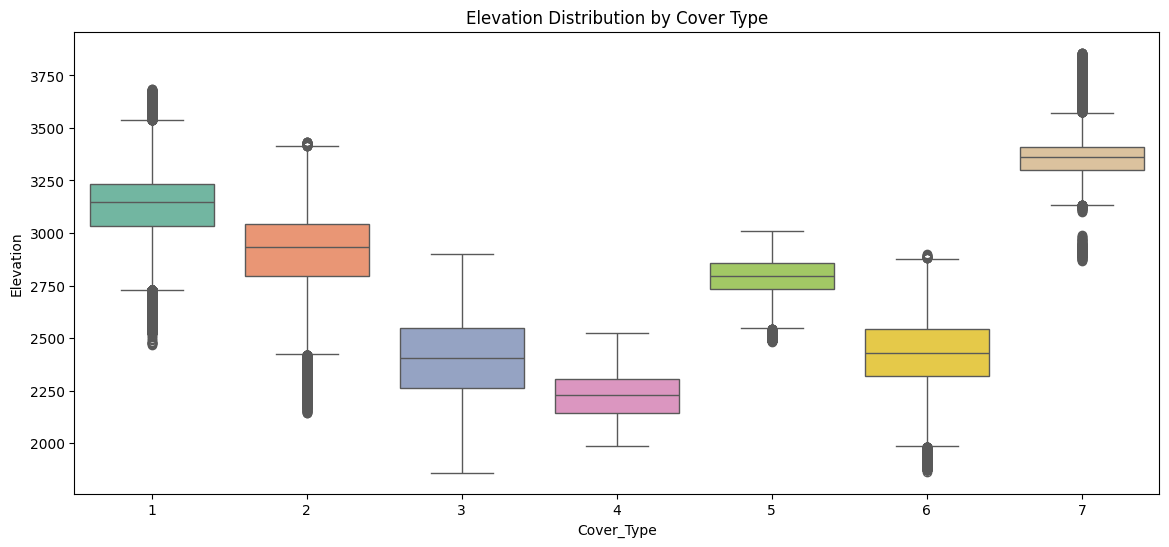

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df_forest, palette='Set2')
plt.title('Elevation Distribution by Cover Type')
plt.savefig(os.path.join(FIGURES_DIR, 'forest_elevation_dist.png'))
plt.show()

## 3.5 Feature Importance

Processing Feature Importance: Forest Cover Type...


C:\Users\NIKHIL AGRAWAL\AppData\Local\Temp\ipykernel_6744\1093813786.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:top_n]], y=feature_names[indices[:top_n]], palette='viridis')


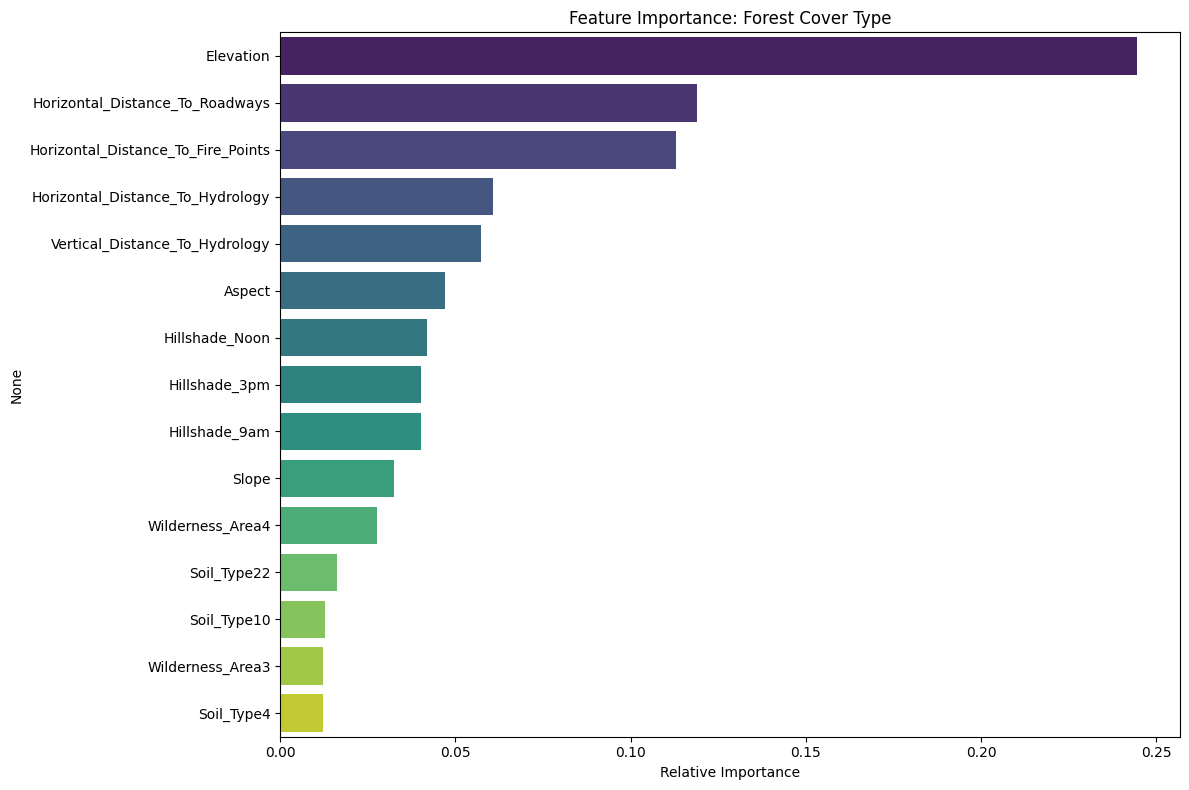

In [24]:
save_and_show_feature_importance(df_forest, 'Cover_Type', 'Forest Cover Type', 'feature_importance_forest.png')